In [21]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
wordLemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [22]:
import re
import math
import operator
import matplotlib.pyplot as plt
import numpy as np

In [23]:
def preserve_alphabets(text):
    regex = r'[^a-zA-Z\s]'
    text = re.sub(regex, '', text)
    return text

In [24]:
def pos_tagging(text):
    pos_tag = nltk.pos_tag(text.split())
    pos_tagged_noun_verb = []
    for word, tag in pos_tag:
        if tag == "NN" or tag == "NNP" or tag == "NNS" or tag == "VB" or tag == "VBD" or tag == "VBG" or tag == "VBN" or tag == "VBP" or tag == "VBZ":
            pos_tagged_noun_verb.append(word)
    return pos_tagged_noun_verb

In [25]:
def lemmatize_words(words):
    lemmatized_words = []
    for word in words:
        lemmatized_words.append(wordLemmatizer.lemmatize(word))
    return lemmatized_words

In [26]:
def freq(words):
    words = [word.lower() for word in words]
    dict_freq = {}
    words_unique = []
    for word in words:
        if word not in words_unique:
            words_unique.append(word)
    for word in words_unique:
        dict_freq[word] = words.count(word)
    return dict_freq

In [27]:
def plot_graph(title, x_tag, dict, data_lim):
    fig, ax = plt.subplots(figsize = (8, 20))
    y_pos = np.arange(len(dict))
    y_pos = y_pos[0:data_lim]
    x_pos = [d[1] for d in dict]
    x_pos = x_pos[0:data_lim]
    y_labels = [d[0] for d in dict]
    ax.set_yticks(y_pos, labels = y_labels[0:data_lim])
    ax.invert_yaxis()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlabel(x_tag)
    ax.barh(y_pos, x_pos, align='center')
    plt.subplots_adjust(left=0.1, right=0.5, top=0.5, bottom=0.1)
    plt.title(title)
    plt.show()

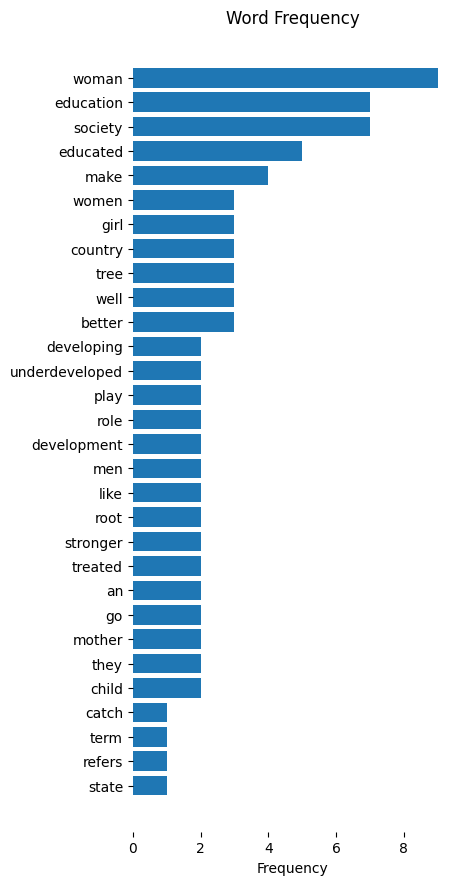

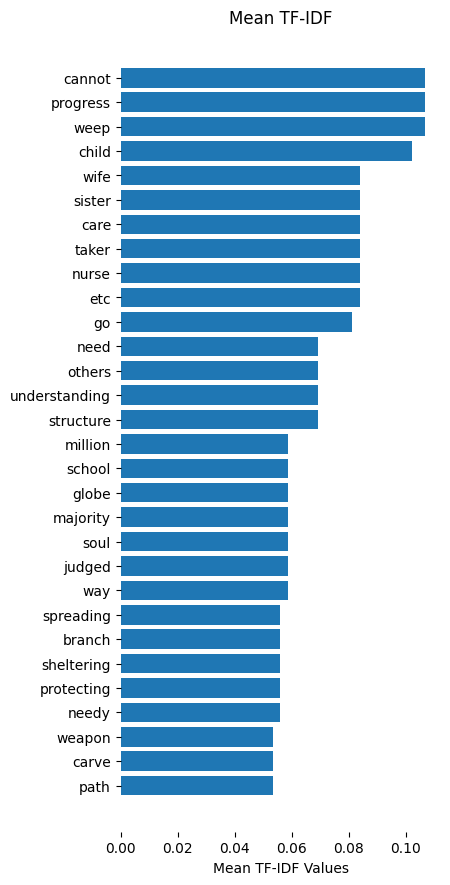

woman 0.08695652173913043 0.17609125905568124
education 0.08695652173913043 0.3979400086720376
catch 0.043478260869565216 1.1760912590556813
term 0.043478260869565216 1.1760912590556813
refers 0.043478260869565216 1.1760912590556813
state 0.043478260869565216 1.1760912590556813
tertiary 0.043478260869565216 1.1760912590556813
health 0.043478260869565216 1.1760912590556813
education 0.08695652173913043 0.3979400086720376
girl 0.043478260869565216 0.6989700043360189
woman 0.08695652173913043 0.17609125905568124

million 0.05 1.1760912590556813
girl 0.05 0.6989700043360189
school 0.05 1.1760912590556813
globe 0.05 1.1760912590556813
majority 0.05 1.1760912590556813
developing 0.05 0.8750612633917001
country 0.05 0.8750612633917001

country 0.058823529411764705 0.8750612633917001
world 0.029411764705882353 1.1760912590556813
developing 0.029411764705882353 0.8750612633917001
country 0.058823529411764705 0.8750612633917001
take 0.029411764705882353 1.1760912590556813
step 0.0294117647058823

In [28]:
try:
    f = open("input.txt", "r", encoding = 'utf-8')
    text = f.read()
except FileNotFoundError:
    text = "This is the sample text."

# partitioning the text into sentences
sentences = sent_tokenize(text)
# extract words that are not stopwords
tokenized_words_with_stopwords = word_tokenize(preserve_alphabets(str(text)))
tokenized_words = []
for word in tokenized_words_with_stopwords:
    if word not in stopwords and len(word) > 1:
        tokenized_words.append(word)
tokenized_words = lemmatize_words(tokenized_words)
# plot a horizontal bar chart of word frequency
word_freq = freq(tokenized_words)
word_freq = sorted(word_freq.items(), key = lambda word_freq: word_freq[1], reverse = True)
plot_graph("Word Frequency", 'Frequency', word_freq, min(30, len(word_freq)))
# plot a horizontal bar chart of mean tfidf for each word
no_of_sentences = len(sentences)
word_stat = {}
mean_tf_idf = {}
for sentence in sentences:
    sentence = preserve_alphabets(sentence)
    tagged_words = pos_tagging(sentence)
    tagged_words = [word.lower() for word in tagged_words]
    tagged_words = lemmatize_words(tagged_words)
    len_sentence = len(sentence.split())
    words = []
    for word in tagged_words:
        word_frequency_in_sentence = 0
        if word not in words and word not in stopwords and len(word) > 1:
            words.append(word)
            for word_in_sentence in tagged_words:
                if word == word_in_sentence:
                    word_frequency_in_sentence = word_frequency_in_sentence + 1
            tf =  word_frequency_in_sentence / len_sentence
            if word in word_stat:
                word_stat[word][0] += 1
                word_stat[word][1] += tf
            else:
                word_stat[word] = [1, tf]
for word, arr in word_stat.items():
    tf = arr[1] / arr[0]
    idf = math.log10(no_of_sentences / arr[0])
    word_stat[word] = [tf, idf]
mean_tf_idf = sorted(word_stat.items(), key = lambda word_stat: word_stat[1][0] * word_stat[1][1], reverse = True)
for c in range(len(mean_tf_idf)):
    mean_tf_idf[c] = (mean_tf_idf[c][0], mean_tf_idf[c][1][0] * mean_tf_idf[c][1][1])
plot_graph("Mean TF-IDF", 'Mean TF-IDF Values', mean_tf_idf, min(30, len(mean_tf_idf)))
# calculate sentence tf-idf rank
c = 0
sentence_with_importance = {}
for sentence in sentences:
    importance = 0
    sentence = preserve_alphabets(sentence)
    tagged_words = pos_tagging(sentence)
    tagged_words = [word.lower() for word in tagged_words]
    tagged_words = lemmatize_words(tagged_words)
    len_sentence = len(sentence.split())
    for word in tagged_words:
        word_frequency_in_sentence = 0
        if word not in stopwords and len(word) > 1:
            tf = tagged_words.count(word) / len_sentence
            idf = word_stat[word][1]
            importance += tf * idf
    sentence_with_importance[c] = importance
    c = c+1
sentence_with_importance = sorted(sentence_with_importance.items(), key=operator.itemgetter(1),reverse=True)

In [29]:
# version a - user input percentage
input_percentage = int(input('Percentage of information to retain (in percent):'))
output_sentence_cnt = int((input_percentage * len(sentences))/100)
sentence_priority = [tup[0] for tup in sentence_with_importance]
sentence_priority_ver_a = sentence_priority[0:output_sentence_cnt]
sentence_priority_ver_a.sort()
summary = []
for c in sentence_priority_ver_a:
    summary.append(sentences[c])
summary = " ".join(summary)
print(summary)
outf = open('summary1.txt', "w", encoding = 'utf-8')
outf.write(summary)
outf.close()

v
An educated man goes out to make the society better, while an educated woman; whether she goes out or stays at home, makes the house and its occupants better. Women play many roles in a society- mother, wife, sister, care taker, nurse etc. An educated mother will make sure that her children are educated, and will weigh the education of a girl child, same as boys.


In [30]:
# version b - self-adaptation by average of importance
average = 0.0
for priority in sentence_with_importance:
    average += priority[1]
average /= no_of_sentences
sentence_priority_ver_b = []
for priority in sentence_with_importance:
    if 1.3 * average < priority[1]:
        sentence_priority_ver_b.append(priority[0])
sentence_priority_ver_b.sort()
summary = []
for c in sentence_priority_ver_b:
    summary.append(sentences[c])
summary = " ".join(summary)
print(summary)
outf = open('summary2.txt', "w", encoding = 'utf-8')
outf.write(summary)
outf.close()

An educated man goes out to make the society better, while an educated woman; whether she goes out or stays at home, makes the house and its occupants better. Women play many roles in a society- mother, wife, sister, care taker, nurse etc. An educated mother will make sure that her children are educated, and will weigh the education of a girl child, same as boys.
